#**Importing Libraries and Reading the Dataset**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score
from sklearn.metrics import confusion_matrix

In [ ]:
hd=pd.read_csv('/content/final_heart.csv')
hd.head()

,ca,chol,thal_3,slope_2,age,exang,trestbps,thal_2,oldpeak,thalach,target
0,2,-0.701940,True,True,-0.256357,0,-0.371077,False,-0.008573,0.801255,0
1,0,-0.892006,True,False,-0.145641,1,0.484371,False,1.907455,0.233473,0
2,0,-1.504441,True,False,1.736541,1,0.769520,False,1.451258,-1.076792,0
3,1,-0.892006,True,True,0.740092,0,0.940610,False,-0.920967,0.495526,0
4,3,1.029772,False,False,0.850808,0,0.370311,True,0.812582,-1.906626,0


**Dropping the 'target' column**

In [ ]:
target = hd['target']
hd = hd.drop("target", axis=1).values  # keep only features

# **K-Means Clustering**

**Elbow Method to Determine K**

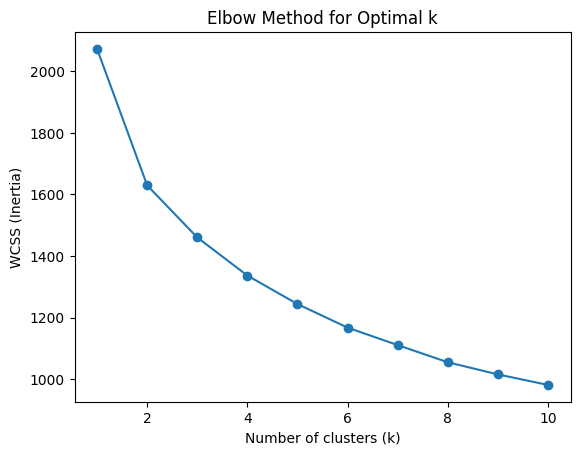

In [ ]:
wcss = []
K = range(1, 11)  # test k from 1 to 10
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(hd)
    wcss.append(kmeans.inertia_)  # inertia_ = WCSS

# Plot elbow
plt.plot(K, wcss, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("WCSS (Inertia)")
plt.title("Elbow Method for Optimal k")
plt.show()

In [ ]:
kmeans = KMeans (n_clusters=2, random_state=0)
kmeans.fit(hd)

KMeans(n_clusters=2, random_state=0)

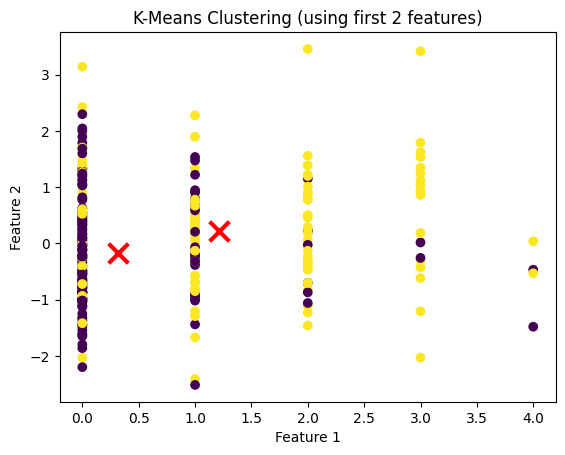

In [ ]:
plt.scatter(hd[:, 0], hd[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            marker='x', s=200, linewidths=3, color='r')
plt.title("K-Means Clustering (using first 2 features)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [ ]:
score = silhouette_score(hd, kmeans.labels_)
print("Silhouette Score:", score)

Silhouette Score: 0.20526859803574532


#**Hierarchical Clustering (Dendrogram Analysis)**

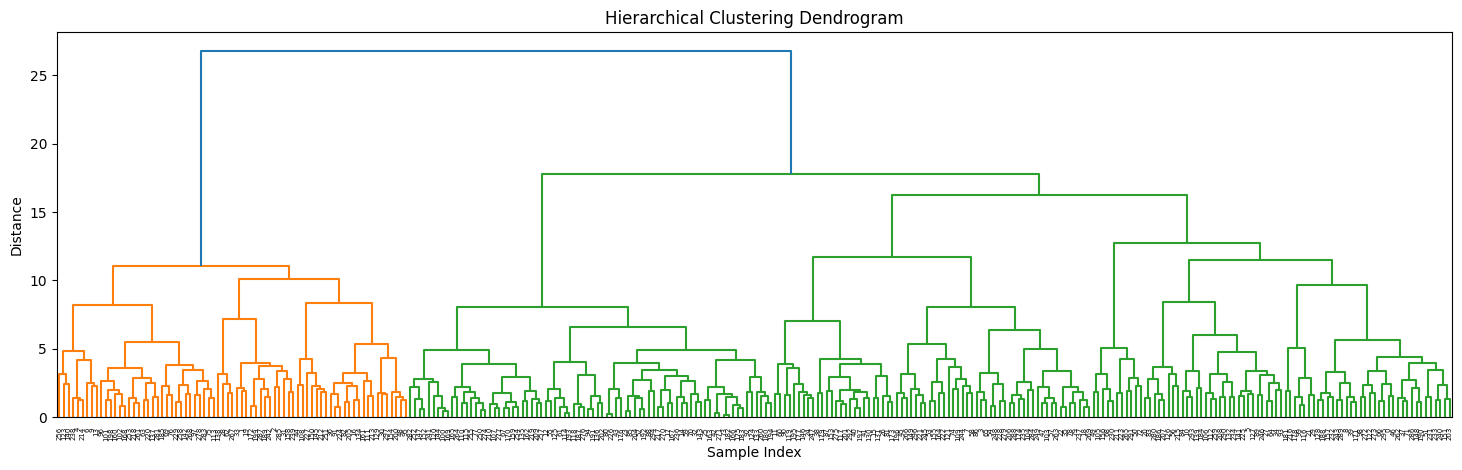

In [ ]:
linked = linkage (hd, 'ward')
# Plot dendrogram

plt.figure(figsize=(18, 5))
dendrogram(linked)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

**Fit Agglomerative Clustering**

In [ ]:
hc = AgglomerativeClustering(n_clusters=2, linkage="ward")
hc_labels = hc.fit_predict(hd)

print("Cluster labels:", hc_labels[:10])

Cluster labels: [0 1 1 0 1 0 1 0 0 1]


# **Comparing Clusters With Actual Disease Labels**

In [ ]:
ari = adjusted_rand_score(target, kmeans.labels_)
print("Adjusted Rand Index (ARI):", ari)

Adjusted Rand Index (ARI): 0.28585390445632086


In [ ]:
print("Homogeneity:", homogeneity_score(target, kmeans.labels_))
print("Completeness:", completeness_score(target, kmeans.labels_))
print("V-Measure:", v_measure_score(target, kmeans.labels_))

Homogeneity: 0.2158919706985483
Completeness: 0.21650935250264733
V-Measure: 0.21620022085230267


In [ ]:
cm = confusion_matrix(target, kmeans.labels_)
cm_df = pd.DataFrame(cm,
                     index=[f"True {i}" for i in set(target)],
                     columns=[f"Cluster {i}" for i in set(kmeans.labels_)])
print(cm_df)

        Cluster 0  Cluster 1
True 0         36        100
True 1        129         33
